## Read Data into Dataframe and Import Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore") 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Read in the data
data = pd.read_csv('loan\\loan.csv')
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

# 1. Data Cleaining

## Step 1 - Removing Unwanted Rows and Columns 
* Check Non Null Data in All Columns

In [3]:
data.notnull().sum().sort_values()

verification_status_joint             0
bc_util                               0
bc_open_to_buy                        0
avg_cur_bal                           0
acc_open_past_24mths                  0
inq_last_12m                          0
total_cu_tl                           0
inq_fi                                0
total_rev_hi_lim                      0
all_util                              0
max_bal_bc                            0
mo_sin_old_il_acct                    0
open_rv_24m                           0
il_util                               0
total_bal_il                          0
mths_since_rcnt_il                    0
open_il_24m                           0
open_il_12m                           0
open_il_6m                            0
open_acc_6m                           0
tot_cur_bal                           0
tot_coll_amt                          0
total_bc_limit                        0
open_rv_12m                           0
mo_sin_old_rev_tl_op                  0


* Check Types of Loan Status

In [4]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

* Drop Current loan , as it is not be required for our analysis 

In [5]:
data = data[data['loan_status'] != 'Current']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.0+ MB


* Drop All Columns with All Missing Values

In [6]:
data = data.dropna(axis=1, how='all')

In [7]:
data.notnull().sum().sort_values()

mths_since_last_record         2740
mths_since_last_delinq        13672
desc                          26050
emp_title                     36191
emp_length                    37544
pub_rec_bankruptcies          37880
last_pymnt_d                  38506
chargeoff_within_12_mths      38521
collections_12_mths_ex_med    38521
revol_util                    38527
tax_liens                     38538
title                         38566
last_credit_pull_d            38575
initial_list_status           38577
out_prncp                     38577
revol_bal                     38577
out_prncp_inv                 38577
total_acc                     38577
total_rec_int                 38577
total_pymnt_inv               38577
total_rec_prncp               38577
total_rec_late_fee            38577
recoveries                    38577
collection_recovery_fee       38577
last_pymnt_amnt               38577
policy_code                   38577
application_type              38577
acc_now_delinq              

* Remove Columns having 1 unique or all unique values.

In [8]:
# Determines and drops columns which have all unique values
def drop_unique_cols():
    uniq_cols = [col for col in data.columns if data[col].nunique() == len(data.index)]
    print("Columns having all unique : ", uniq_cols)
    for cols in uniq_cols:
        del data[cols]

# Determines and drops columns having only 1 unique value
def drop_cols_having_only_1_unqiue_value():
    cols_having_only_1_unqiue_value = [col for col in data.columns if data[col].nunique() == 1]
    print("Columns having only 1 unique values: ", cols_having_only_1_unqiue_value)
    for cols in cols_having_only_1_unqiue_value:
        del data[cols]

drop_unique_cols()
drop_cols_having_only_1_unqiue_value()

Columns having all unique :  ['id', 'member_id', 'url']
Columns having only 1 unique values:  ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


* Drop Columns which require much more processing 
 1. 'desc', emp_title' and 'title' to bring out insights - They will not be required for this EDA
 2. Some Columns dont add much importance to our problem statement - 'last_pymnt_d', 'earliest_cr_line','total_rec_int', total_rec_late_fee' and 'total_rec_prncp'

In [9]:
data = data.drop(['desc', 'emp_title','title'], axis=1)
data = data.drop(['last_pymnt_d', 'earliest_cr_line', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_length               37544 non-null  object 
 9   home_ownership           38577 non-null  object 
 10  annual_inc               38577 non-null  float64
 11  verification_status      38577 non-null  object 
 12  issue_d                  38577 non-null  object 
 13  loan_status              38577 non-null  object 
 14  purpose               

* Check mths_since_last_delinq

In [10]:
data['mths_since_last_delinq'].describe()

count    13672.000000
mean        35.882534
std         22.028093
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

   - As the Number of non null rows are quile less less than 36% and the data is numerical , Imputing it with mean will make the property baised . So we are dropping it.

In [11]:
data.drop(['mths_since_last_delinq'], axis=1, inplace=True)
data.notnull().sum().sort_values()

mths_since_last_record      2740
emp_length                 37544
pub_rec_bankruptcies       37880
revol_util                 38527
last_credit_pull_d         38575
recoveries                 38577
total_pymnt_inv            38577
total_pymnt                38577
total_acc                  38577
dti                        38577
revol_bal                  38577
pub_rec                    38577
open_acc                   38577
last_pymnt_amnt            38577
inq_last_6mths             38577
delinq_2yrs                38577
collection_recovery_fee    38577
loan_amnt                  38577
purpose                    38577
loan_status                38577
issue_d                    38577
verification_status        38577
annual_inc                 38577
home_ownership             38577
sub_grade                  38577
grade                      38577
installment                38577
int_rate                   38577
term                       38577
funded_amnt_inv            38577
funded_amn

   - As the Number of null rows are quile less for all of the columns having null value , we are dropping the rows instead of inputing the values.

In [12]:
data.dropna(subset=['pub_rec_bankruptcies','revol_util','last_credit_pull_d','emp_length'], axis=0, inplace=True)
data.notnull().sum().sort_values()

mths_since_last_record      1929
loan_amnt                  36799
last_pymnt_amnt            36799
collection_recovery_fee    36799
recoveries                 36799
total_pymnt_inv            36799
total_pymnt                36799
total_acc                  36799
revol_util                 36799
revol_bal                  36799
pub_rec                    36799
open_acc                   36799
inq_last_6mths             36799
delinq_2yrs                36799
dti                        36799
last_credit_pull_d         36799
addr_state                 36799
purpose                    36799
loan_status                36799
issue_d                    36799
verification_status        36799
annual_inc                 36799
home_ownership             36799
emp_length                 36799
sub_grade                  36799
grade                      36799
installment                36799
int_rate                   36799
term                       36799
funded_amnt_inv            36799
funded_amn

## Step 2 - Fixing Column Values and Data Types

In [13]:
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                      2
int_rate                336
grade                     7
sub_grade                35
emp_length               11
home_ownership            4
verification_status       3
issue_d                  52
loan_status               2
purpose                  14
zip_code                808
addr_state               49
revol_util             1086
last_credit_pull_d       97
dtype: int64

* Correct columns datatypes
     * Change int_rate, revol_util, funded_amnt, loan_amnt , funded_amnt_inv, annual_inc to float
     * Change issue_d to DateTime

In [14]:
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')
data['revol_util'] = data['revol_util'].str.rstrip('%').astype('float')

data = data.astype({ "loan_amnt": float, "funded_amnt": float, "funded_amnt_inv": float, "annual_inc": float})

data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')

data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           4
verification_status      3
loan_status              2
purpose                 14
zip_code               808
addr_state              49
last_credit_pull_d      97
dtype: int64

* Note we are not converting term to numerical as the data has only two possible values and is catagorical.

* Drop duplicates if any

In [15]:
## Drop duplicates if there are any
data.drop_duplicates()
data.shape

(36799, 33)

* Remove Outliers for loan_amnt , funded_amnt_inv and annual_inc

In [16]:
# Remove outliers using IQR for loan amount
loan_amnt_iqr = data.loan_amnt.quantile(0.75) - data.loan_amnt.quantile(0.25)
loan_amnt_lower_bound = data.loan_amnt.quantile(0.25) - 1.5*loan_amnt_iqr
loan_amnt_upper_bound = data.loan_amnt.quantile(0.75) + 1.5*loan_amnt_iqr

data = data[(data.loan_amnt >= loan_amnt_lower_bound) & (data.loan_amnt <= loan_amnt_upper_bound)]

# Remove outliers using IQR for funded amount invested
funded_amnt_inv_iqr = data.funded_amnt_inv.quantile(0.75) - data.funded_amnt_inv.quantile(0.25)
funded_amnt_inv_lower_bound = data.funded_amnt_inv.quantile(0.25) - 1.5*funded_amnt_inv_iqr
funded_amnt_inv_upper_bound = data.funded_amnt_inv.quantile(0.75) + 1.5*funded_amnt_inv_iqr

data = data[(data.funded_amnt_inv >= funded_amnt_inv_lower_bound) & (data.funded_amnt_inv <= funded_amnt_inv_upper_bound)]

# Remove outliers using IQR for funded amount invested
annual_inc_iqr = data.annual_inc.quantile(0.75) - data.annual_inc.quantile(0.25)
annual_inc_lower_bound = data.annual_inc.quantile(0.25) - 1.5*annual_inc_iqr
annual_inc_upper_bound = data.annual_inc.quantile(0.75) + 1.5*annual_inc_iqr

data = data[(data.annual_inc >= annual_inc_lower_bound) & (data.annual_inc <= annual_inc_upper_bound)]
data.shape

(33826, 33)

# 2. Derived Metrics

* Converting dates to Month and Year will help in analysis

In [17]:
data['issue_m'] = pd.to_datetime(data['issue_d'], format='%b-%y').dt.month
data['issue_y'] = pd.to_datetime(data['issue_d'], format='%b-%y').dt.year
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_m,issue_y
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1,NaN,3,0,13648,83.7,9,5863.155187,5833.84,0.00,0.00,171.62,May-16,0.0,12,2011
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,5,NaN,3,0,1687,9.4,4,1008.710000,1008.71,117.08,1.11,119.66,Sep-13,0.0,12,2011
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2,NaN,2,0,2956,98.5,10,3005.666844,3005.67,0.00,0.00,649.91,May-16,0.0,12,2011
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1,NaN,10,0,5598,21.0,37,12231.890000,12231.89,0.00,0.00,357.48,Apr-16,0.0,12,2011
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,3,NaN,9,0,7963,28.3,12,5632.210000,5632.21,0.00,0.00,161.03,Jan-16,0.0,12,2011


* % of Amount funded by Investor to the Amount Asked by Borrower

In [18]:
data['funded_amnt_%'] = data['funded_amnt_inv']/data['loan_amnt'] *100
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_m,issue_y,funded_amnt_%
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,0,1,NaN,3,0,13648,83.7,9,5863.155187,5833.84,0.00,0.00,171.62,May-16,0.0,12,2011,99.5
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,0,5,NaN,3,0,1687,9.4,4,1008.710000,1008.71,117.08,1.11,119.66,Sep-13,0.0,12,2011,100.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,0,2,NaN,2,0,2956,98.5,10,3005.666844,3005.67,0.00,0.00,649.91,May-16,0.0,12,2011,100.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,0,1,NaN,10,0,5598,21.0,37,12231.890000,12231.89,0.00,0.00,357.48,Apr-16,0.0,12,2011,100.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,0,3,NaN,9,0,7963,28.3,12,5632.210000,5632.21,0.00,0.00,161.03,Jan-16,0.0,12,2011,100.0


* Create a defaulted column

In [19]:
data['defaulted'] = data.loan_status.apply(lambda x: 1 if (x == "Charged Off") else 0) 
data.defaulted.value_counts()

0    29005
1     4821
Name: defaulted, dtype: int64

* Derieve Columns using Buckets

In [20]:
# Convert annual income into a categorical variable for further analysis
annual_inc_25_quantile = int(data.annual_inc.quantile(0.25))
annual_inc_50_quantile = int(data.annual_inc.quantile(0.5))
annual_inc_75_quantile = int(data.annual_inc.quantile(0.75))  

def binning_annual_inc(annual_inc):  
    if (annual_inc <= annual_inc_25_quantile):
        return "0-{}".format(annual_inc_25_quantile)
    if (annual_inc > annual_inc_25_quantile and annual_inc <= annual_inc_50_quantile):
        return "{}-{}".format(annual_inc_25_quantile, annual_inc_50_quantile)
    if (annual_inc > annual_inc_50_quantile and annual_inc <= annual_inc_75_quantile):
        return "{}-{}".format(annual_inc_50_quantile, annual_inc_75_quantile)
    return ">{}".format(annual_inc_75_quantile)

data['annual_inc_category'] = data.annual_inc.apply(binning_annual_inc)

# Convert funded amount invested into a categorical variable for further analysis
funded_amnt_inv_25_quantile = int(data.funded_amnt_inv.quantile(0.25))
funded_amnt_inv_50_quantile = int(data.funded_amnt_inv.quantile(0.5))
funded_amnt_inv_75_quantile = int(data.funded_amnt_inv.quantile(0.75)) 

def binning_funded_amnt_inv(funded_amnt_inv):  
    if (funded_amnt_inv <= funded_amnt_inv_25_quantile):
        return "0-{}".format(funded_amnt_inv_25_quantile)
    if (funded_amnt_inv > funded_amnt_inv_25_quantile and funded_amnt_inv <= funded_amnt_inv_50_quantile):
        return "{}-{}".format(funded_amnt_inv_25_quantile, funded_amnt_inv_50_quantile)
    if (funded_amnt_inv > funded_amnt_inv_50_quantile and funded_amnt_inv <= funded_amnt_inv_75_quantile):
        return "{}-{}".format(funded_amnt_inv_50_quantile, funded_amnt_inv_75_quantile)
    return ">{}".format(funded_amnt_inv_75_quantile)

data['funded_amnt_inv_category'] = data.funded_amnt_inv.apply(binning_funded_amnt_inv)

# Convert loan amount into a categorical variable for further analysis
loan_amt_25_quantile = int(data.loan_amnt.quantile(0.25))
loan_amt_50_quantile = int(data.loan_amnt.quantile(0.5))
loan_amt_75_quantile = int(data.loan_amnt.quantile(0.75))  

def binning_loan_amnt(loan_amnt):  
    if (loan_amnt <= loan_amt_25_quantile):
        return "0-{}".format(loan_amt_25_quantile)
    if (loan_amnt > loan_amt_25_quantile and loan_amnt <= loan_amt_50_quantile):
        return "{}-{}".format(loan_amt_25_quantile, loan_amt_50_quantile)
    if (loan_amnt > loan_amt_50_quantile and loan_amnt <= loan_amt_75_quantile):
        return "{}-{}".format(loan_amt_50_quantile, loan_amt_75_quantile)
    return ">{}".format(loan_amt_75_quantile)

data['loan_amnt_category'] = data.loan_amnt.apply(binning_loan_amnt)

# Convert dti into a categorical variable
def dti_bucketing(dti):
    if (dti <= 8):
        return 'VERY LOW'
    if (dti > 8 and dti <=13):
        return 'LOW'
    if (dti > 13 and dti <=17):
        return 'MEDIUM'
    if (dti >= 17 and dti < 19):
        return 'HIGH'
    return 'VERY HIGH'
data['dti_bucket'] = data.dti.apply(dti_bucketing)

# Convert interest rate into categorical variable:
int_rate_25_quantile = int(data.int_rate.quantile(0.25))
int_rate_50_quantile = int(data.int_rate.quantile(0.5))
int_rate_75_quantile = int(data.int_rate.quantile(0.75))

def bin_int_rate(int_rate):
    if(int_rate <= int_rate_25_quantile):
        return "LOW"
    if(int_rate > int_rate_25_quantile and int_rate <= int_rate_50_quantile):
        return "MEDIUM"
    if(int_rate > int_rate_50_quantile and int_rate <= int_rate_75_quantile):
        return "HIGH"
    return "VERY HIGH"

data['int_rates_bucket'] = data.int_rate.apply(bin_int_rate)

# 3. Univariate Analysis

In [21]:
defaultedLoan = data[data['loan_status'] == 'Charged Off']
defaultedLoan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_m,issue_y,funded_amnt_%,defaulted
count,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,407.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.0
mean,10966.842979,10686.921800,10051.897856,13.706055,307.282883,55453.135422,14.120095,0.164696,1.046463,92.095823,9.096660,0.086497,12402.644472,55.710552,20.953329,6158.208880,5833.187164,577.959681,76.236336,302.918009,0.066791,7.349927,2010.386434,93.407807,1.0
std,6608.436899,6354.118399,6244.033511,3.564856,182.049923,25292.785857,6.570151,0.528293,1.139228,21.928975,4.443909,0.288411,13333.580204,27.802625,11.228174,5538.057975,5411.604097,1449.073642,356.761177,506.500168,0.251342,3.337846,0.821782,17.924716,0.0
min,1000.000000,1000.000000,0.000000,5.420000,22.790000,4080.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2007.000000,0.000000,1.0
25%,5400.000000,5200.000000,5000.000000,11.260000,166.580000,36400.000000,9.230000,0.000000,0.000000,87.000000,6.000000,0.000000,3894.000000,34.400000,12.000000,2110.920000,1889.100000,9.340000,0.000000,111.970000,0.000000,5.000000,2010.000000,98.333245,1.0
50%,10000.000000,10000.000000,9000.000000,13.490000,277.360000,50400.000000,14.440000,0.000000,1.000000,96.000000,8.000000,0.000000,8783.000000,58.700000,19.000000,4553.570000,4201.680000,169.550000,2.390000,227.920000,0.000000,8.000000,2011.000000,100.000000,1.0
75%,15000.000000,15000.000000,14501.912530,16.290000,410.750000,70000.000000,19.400000,0.000000,2.000000,107.500000,11.000000,0.000000,16339.000000,78.900000,28.000000,8472.770000,8027.530000,534.440000,8.091000,381.040000,0.000000,10.000000,2011.000000,100.000000,1.0
max,29000.000000,29000.000000,26475.000000,24.400000,934.550000,139000.000000,29.850000,8.000000,8.000000,119.000000,38.000000,2.000000,137112.000000,99.900000,74.000000,34765.350000,34730.840000,21810.310000,7002.190000,12818.380000,2.000000,12.000000,2011.000000,100.000000,1.0


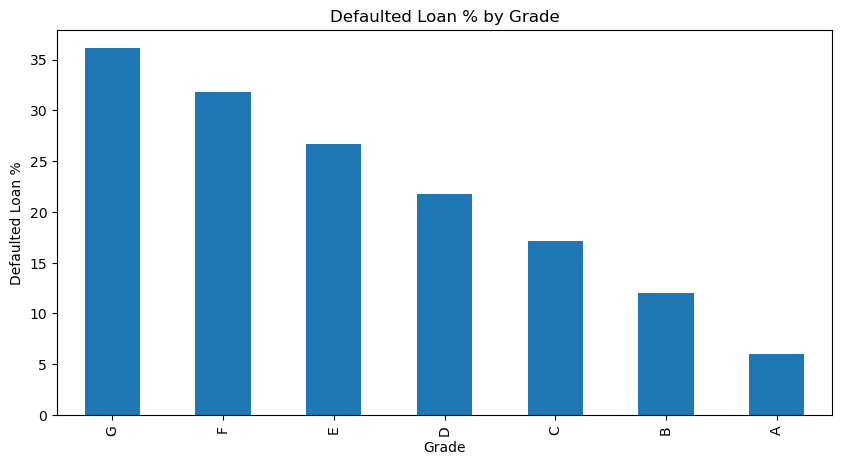

In [22]:
grade = round(defaultedLoan['grade'].value_counts()/data['grade'].value_counts()*100, 2).sort_values(ascending=False)
grade.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Grade')
plt.ylabel('Defaulted Loan %')
plt.title('Defaulted Loan % by Grade')
plt.show()

**The Risk increases with the increase of Grade .**

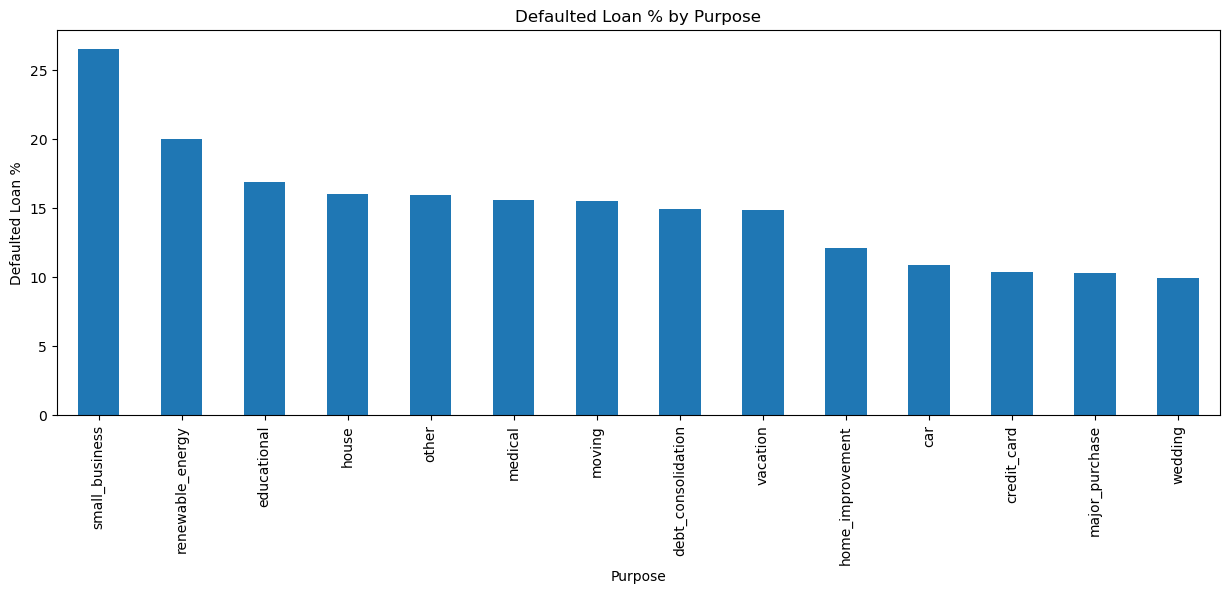

In [23]:
badloan_percent = round(defaultedLoan['purpose'].value_counts()/data['purpose'].value_counts()*100, 2).sort_values(ascending=False)
#Plot the above badloan_percent as hist plot
badloan_percent.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Purpose')
plt.ylabel('Defaulted Loan %')
plt.title('Defaulted Loan % by Purpose')
plt.show()

**We can say that the chances of bad loans is the most for small business .**

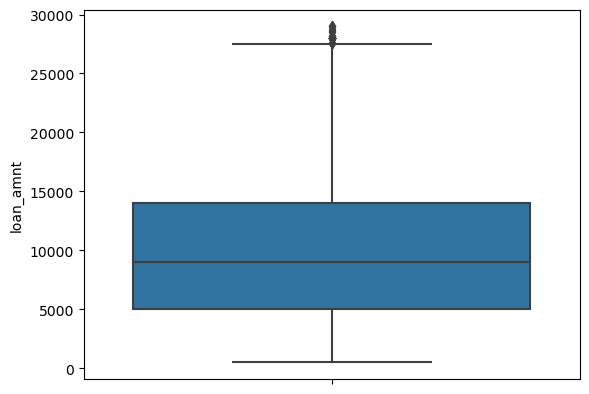

count    33826.000000
mean     10157.092178
std       6149.602700
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [24]:
sns.boxplot(y="loan_amnt", data=data)
plt.show()
data.loan_amnt.describe()

#### 50% of folks ask for around ~9000 as loan amount

count    33826.000000
mean      9527.230321
std       5853.902101
min          0.000000
25%       5000.000000
50%       8350.000000
75%      13000.000000
max      26814.098160
Name: funded_amnt_inv, dtype: float64

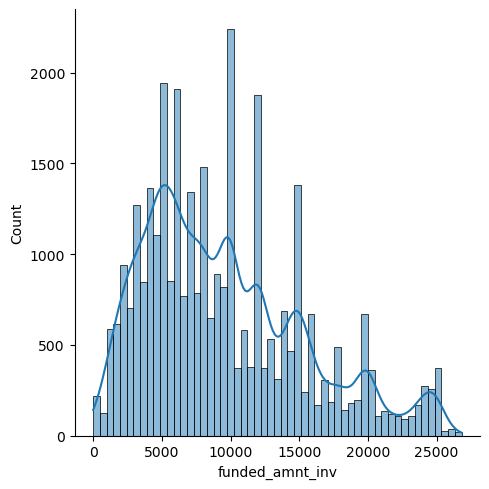

In [25]:
sns.displot(data, x="funded_amnt_inv", kde = True)
data.funded_amnt_inv.describe()

#### From the above plots its evident that loan amount asked for and loan amount funded by investors at around multiples of 5000(5000, 10000, 12500, 15000, 20000, 25000) and 50% of folks are disbursed loan amount at around 8200

count    33826.000000
mean        11.836514
std          3.611809
min          5.420000
25%          8.900000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

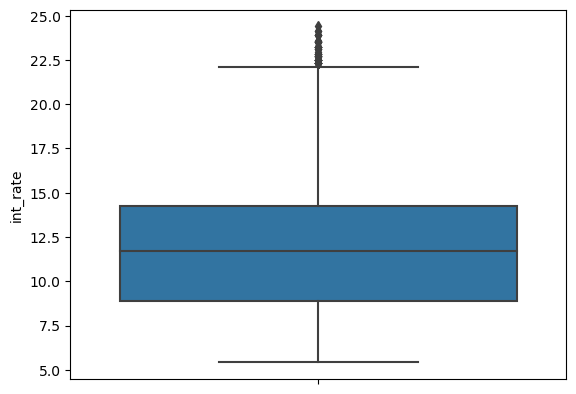

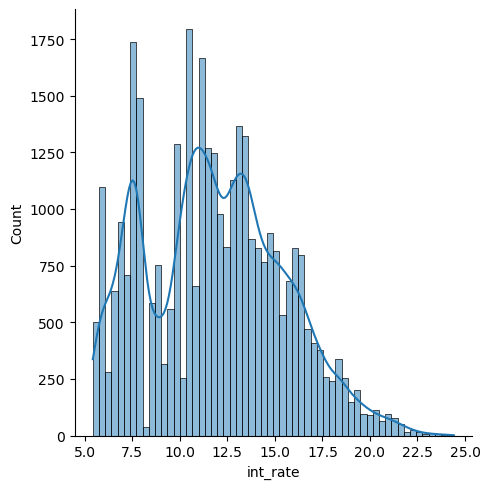

In [26]:
sns.boxplot(y="int_rate", data=data)
sns.displot(data, x="int_rate", kde = True)

data.int_rate.describe()

* A lot of folks are issued interest at ~8% and betwen (10 - 14.5)% 
* Very less people are issued interest between (8-10)%
* 50% of folks are issued loan at interest rate ~11.5%

## 4. Bivariate Analysis

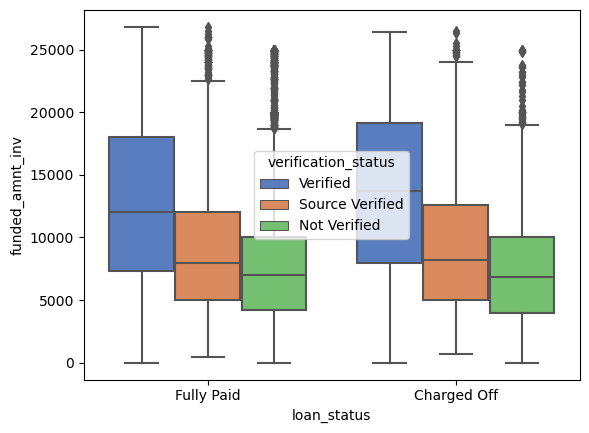

In [27]:
sns.boxplot(y="funded_amnt_inv", x="loan_status", palette="muted", hue="verification_status", data=data)
plt.show()


#### From the above plot , we can not see much influence of verification_status on Defaults for a given amount.

<Axes: xlabel='loan_status', ylabel='funded_amnt_inv'>

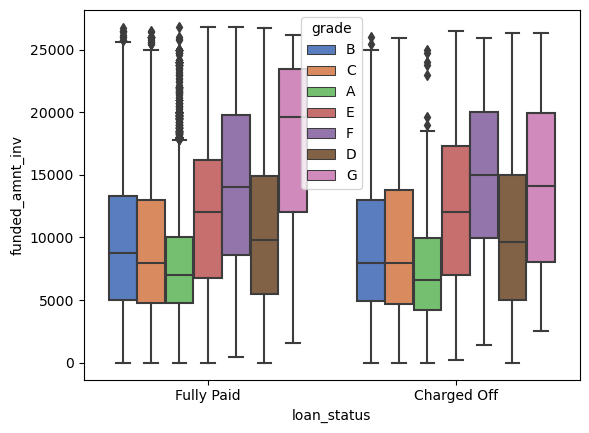

In [28]:
sns.boxplot(y="funded_amnt_inv", x="loan_status", palette="muted", hue="grade", data=data)

#### Grade seems to have no to less impact whether the loan would be defaulted for a given amount

In [29]:
round(data[data['loan_status'] == 'Charged Off'].groupby(["home_ownership"])['loan_status'].count()/data.groupby(["home_ownership"])['loan_status'].count()*100,2)

home_ownership
MORTGAGE    13.40
OTHER       18.89
OWN         14.33
RENT        14.94
Name: loan_status, dtype: float64

In [30]:
data.groupby(["home_ownership"])['loan_amnt'].mean()

home_ownership
MORTGAGE    11146.602111
OTHER       10637.500000
OWN          9453.203343
RENT         9422.616726
Name: loan_amnt, dtype: float64

### **An individual with home ownership status as "OTHER" and they generally take a higher loan amount and there is a very high tendency of their loan being "Charged off"**

<Axes: xlabel='loan_amnt_category', ylabel='annual_inc'>

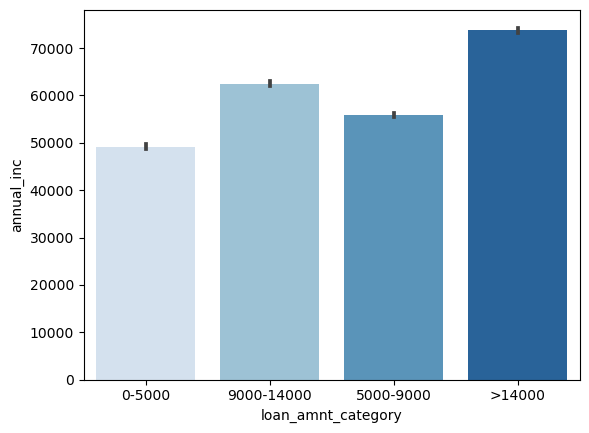

In [31]:
sns.barplot(x = 'loan_amnt_category',
            y = 'annual_inc',
            data = data,
            palette = "Blues")

### **Loan amount value is inversely proportional to amount of folks asking for that particular loan amount**

In [32]:
round(data[data['loan_status'] == 'Charged Off'].groupby(["annual_inc_category"])['loan_status'].count()/data.groupby(["annual_inc_category"])['loan_status'].count()*100,2)

annual_inc_category
0-40000        17.64
40000-55146    14.88
55146-75821    13.65
>75821         10.70
Name: loan_status, dtype: float64

#### **As the Annual income increases the tendency of some to default decreases**

In [33]:
round(data[data['loan_status'] == 'Charged Off'].groupby(["int_rates_bucket"])['loan_status'].count()/data.groupby(["int_rates_bucket"])['loan_status'].count()*100,2)

int_rates_bucket
HIGH         14.98
LOW           5.25
MEDIUM       10.22
VERY HIGH    23.92
Name: loan_status, dtype: float64

#### **The higher the Interest rates higher are the chances of an individual to default on the loan which suggests there is a higher likelihood of loan getting defaulted when loan is disbursed with higher interest rates**

In [34]:
round(data[data['loan_status'] == 'Charged Off'].groupby(["issue_y"])['loan_status'].count()/data.groupby(["issue_y"])['loan_status'].count()*100,2)

issue_y
2007    28.57
2008    15.38
2009    12.62
2010    12.66
2011    15.54
Name: loan_status, dtype: float64

### **2007, followed by 2011 and 2008 experienced most number of people with charged off loans, the amount of fully paid loan also increased, This is probably as after effect of recession happened**

945xx    463
112xx    458
100xx    451
606xx    451
900xx    394
070xx    391
021xx    338
300xx    331
926xx    316
941xx    313
917xx    310
331xx    306
750xx    305
921xx    300
770xx    268
113xx    249
117xx    245
852xx    226
913xx    223
330xx    219
891xx    216
334xx    205
925xx    204
080xx    204
920xx    202
902xx    200
951xx    195
980xx    192
104xx    192
303xx    186
201xx    185
200xx    181
928xx    175
802xx    175
191xx    174
212xx    172
923xx    169
940xx    165
301xx    165
554xx    163
956xx    159
787xx    157
600xx    156
850xx    156
088xx    155
207xx    155
950xx    153
328xx    150
604xx    148
752xx    148
601xx    147
853xx    144
333xx    142
981xx    139
190xx    139
773xx    137
958xx    136
327xx    129
060xx    128
481xx    128
028xx    127
064xx    127
208xx    123
210xx    121
114xx    119
432xx    119
018xx    119
322xx    118
972xx    117
152xx    117
760xx    115
800xx    114
111xx    113
335xx    112
336xx    112
441xx    111
890xx    110

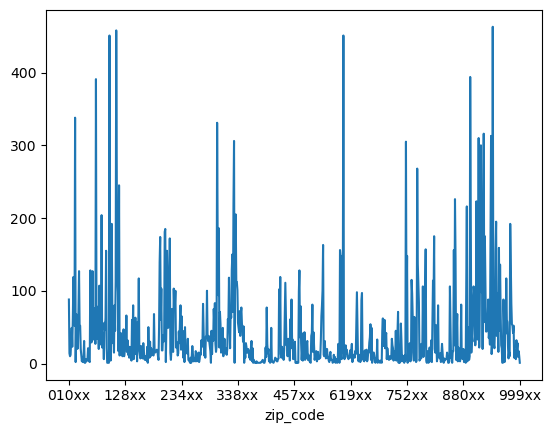

In [35]:
data.groupby(["zip_code"]).defaulted.count().plot()
data.zip_code.value_counts()

#### **Folks with zipcode ranging from 010xx-12xx, living around 338xx or 754xx, 622xx, 882xx-90xx have higher tendency of defaulting the loans**

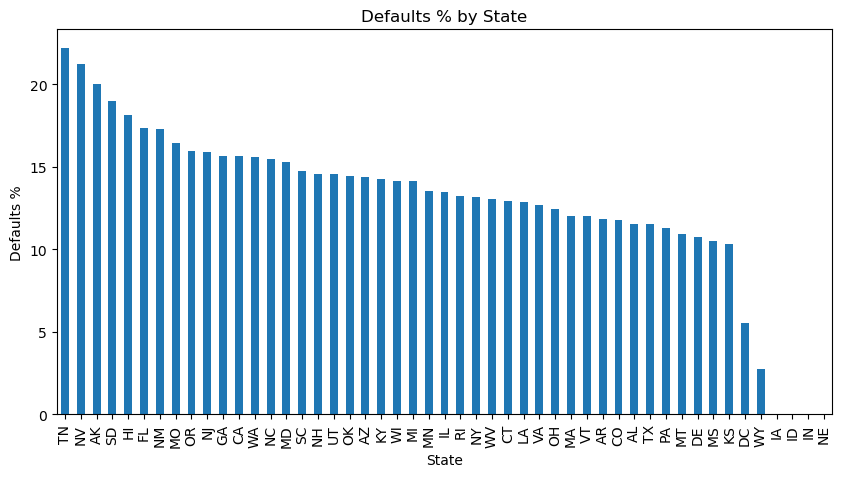

In [36]:
grade = round(defaultedLoan['addr_state'].value_counts()/data['addr_state'].value_counts()*100, 2).sort_values(ascending=False)
grade.plot(kind='bar', figsize=(10, 5))
plt.xlabel('State')
plt.ylabel('Defaults %')
plt.title('Defaults % by State')
plt.show()

#### **We can infer that loans from States 'TN' , 'NV' and 'AK' have higher probability of Defaults.**

In [37]:

round(data[data['loan_status'] == 'Charged Off'].groupby(["pub_rec_bankruptcies"])['loan_status'].count()/data.groupby(["pub_rec_bankruptcies"])['loan_status'].count()*100,2)

pub_rec_bankruptcies
0.0    13.91
1.0    21.68
2.0    40.00
Name: loan_status, dtype: float64

### **As the publicly recorded bankcruptcies increases the Charge off/Defaulting percentage of an individual also increases which suggests there is a higher likelihood of loan getting defaulted when loan is disbursed to individual with higher publicly recorded bankruptices although we dont have a lot entries for individual with 2 publicly recorded bankruptcies**

In [38]:
data.groupby(["dti_bucket", "loan_status"]).defaulted.count()


dti_bucket  loan_status
HIGH        Charged Off     468
            Fully Paid     2590
LOW         Charged Off    1071
            Fully Paid     6871
MEDIUM      Charged Off    1010
            Fully Paid     5831
VERY HIGH   Charged Off    1307
            Fully Paid     6789
VERY LOW    Charged Off     965
            Fully Paid     6924
Name: defaulted, dtype: int64

In [39]:
round(data[data['loan_status'] == 'Charged Off'].groupby(["dti_bucket"])['loan_status'].count()/data.groupby(["dti_bucket"])['loan_status'].count()*100,2)

dti_bucket
HIGH         15.30
LOW          13.49
MEDIUM       14.76
VERY HIGH    16.14
VERY LOW     12.23
Name: loan_status, dtype: float64

### **As the dti keeps on increasing the Charge off percentage also increases which suggests there is a higher likelihood of loan getting defaulted when loan is disbursed to individual with higher dti**

In [40]:
round(data[data['loan_status'] == 'Charged Off'].groupby(["grade", "sub_grade"])['loan_status'].count()/data.groupby(["grade", "sub_grade"])['loan_status'].count()*100,2)

grade  sub_grade
A      A1            2.41
       A2            4.91
       A3            5.26
       A4            6.22
       A5            8.24
B      B1            9.15
       B2           10.78
       B3           11.91
       B4           13.41
       B5           13.83
C      C1           15.79
       C2           16.47
       C3           18.50
       C4           17.64
       C5           18.25
D      D1           17.84
       D2           20.81
       D3           22.24
       D4           23.20
       D5           25.67
E      E1           26.84
       E2           25.70
       E3           23.61
       E4           29.88
       E5           29.00
F      F1           27.59
       F2           29.61
       F3           30.08
       F4           33.61
       F5           49.37
G      G1           33.33
       G2           40.00
       G3           45.71
       G4           22.50
       G5           45.00
Name: loan_status, dtype: float64

### **When grouped by grade, subgrades, It's found that as we move to lower grades the Charge off proportions keeps on increasing which suggests there is higher chance of loans being defaulted when disbursed to individual with lower employment grades**